### **Lab6.ipynb**

#### Activity
- Data science - Laboratorio 6

#### Authors: 
- Diego Lemus
- Fabián Juárez


#### Date:
- 8 de Septiembre 2024


#### Repository:
- Link: https://github.com/FabianJuarez182/DS-LAB6


### Task 2 y 3

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import string

# Cargar el archivo CSV
df = pd.read_csv('train.csv')

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub(r'\@\w+|\#|\d+', '', text)  # Quitar hashtags, menciones, y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Aplicar la función de limpieza a la columna de texto
df['cleaned_text'] = df['text'].apply(clean_text)

# Separar en tweets de desastres y no desastres
disaster_tweets = df[df['target'] == 1]['cleaned_text']
non_disaster_tweets = df[df['target'] == 0]['cleaned_text']

# Calcular la frecuencia de las palabras
disaster_words = Counter(" ".join(disaster_tweets).split())
non_disaster_words = Counter(" ".join(non_disaster_tweets).split())


Descripción de forma detallada las actividades de preprocesamiento que llevó a cabo:

1. **Cargar el archivo CSV**:
   - Se carga el archivo CSV que contiene los datos de los tweets en un DataFrame de pandas.

2. **Función para limpiar el texto**:
  
   - **Convertir a minúsculas**: 
     Convierte todo el texto a minúsculas para asegurar la uniformidad y evitar diferencias entre palabras como "Desastre" y "desastre".

   - **Eliminar URLs**:
     Elimina cualquier URL presente en el texto, ya que estas no aportan valor al análisis de contenido.

   - **Eliminar caracteres especiales y signos de puntuación**:
     Elimina menciones, hashtags, números y signos de puntuación para limpiar el texto y enfocarse en las palabras relevantes.

   - **Eliminar stopwords**:
     Elimina palabras comunes (stopwords) que no aportan mucho significado, como "the", "and", "is", etc., utilizando una lista predefinida de stopwords en inglés.

3. **Aplicar la función de limpieza a la columna de texto**:
   - Aplica la función `clean_text` a cada tweet en la columna 'text' y guarda el resultado en una nueva columna 'cleaned_text'.

4. **Separar en tweets de desastres y no desastres**:
   - Divide los tweets en dos grupos: aquellos que son sobre desastres (`target` == 1) y aquellos que no lo son (`target` == 0).

5. **Calcular la frecuencia de las palabras**:
   - Cuenta la frecuencia de cada palabra en los tweets de desastres y no desastres utilizando la clase `Counter` de la biblioteca `collections`.

### Task 4

In [2]:
# Obtener las palabras más comunes en tweets de desastres
common_disaster_words = disaster_words.most_common(20)
# Obtener las palabras más comunes en tweets que no son de desastres
common_non_disaster_words = non_disaster_words.most_common(20)

# Mostrar resultados
print("Palabras más comunes en tweets de desastres:")
print(common_disaster_words)

print("\nPalabras más comunes en tweets que no son de desastres:")
print(common_non_disaster_words)

Palabras más comunes en tweets de desastres:
[('news', 138), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93), ('like', 92), ('pm', 89), ('hiroshima', 89), ('just', 86), ('fires', 85), ('storm', 85), ('crash', 84), ('families', 81), ('train', 79), ('emergency', 76), ('buildings', 75), ('bomb', 74)]

Palabras más comunes en tweets que no son de desastres:
[('like', 253), ('im', 243), ('just', 231), ('amp', 193), ('new', 168), ('dont', 141), ('body', 112), ('video', 96), ('people', 90), ('love', 89), ('know', 85), ('time', 84), ('got', 83), ('day', 81), ('emergency', 81), ('going', 75), ('want', 67), ('good', 67), ('think', 66), ('man', 62)]


1. **¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?**

    Las palabras y frases que sean representativas de desastres, como “terremoto”, “inundación”, “evacuación”, “rescate”, “emergencia”, etc., serán más útiles para mejorar el modelo de clasificación. Sin embargo, también parecen contener muchas palabras y frases que no son particularmente informativas o relevantes para la clasificación de tweets de desastres; por ejemplo, “aa ayyo” y “aaaa ok” no aportan mucho contexto útil.


2. **¿Vale la pena explorar bigramas o trigramas para analizar contexto?**

    Sí, vale la pena explorar bigramas y trigramas para analizar el contexto, ya que pueden capturar relaciones entre palabras que las palabras individuales no pueden, mejorando así la precisión del modelo.

###  Task 5

In [3]:

# Exploración de bigramas y trigramas
from sklearn.feature_extraction.text import CountVectorizer

# Bigramas
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])
bigram_counts = Counter(bigram_vectorizer.get_feature_names_out())

# Trigramas
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = trigram_vectorizer.fit_transform(df['cleaned_text'])
trigram_counts = Counter(trigram_vectorizer.get_feature_names_out())

print("\nAlgunos bigramas comunes:")
print(bigram_counts.most_common(10))

print("\nAlgunos trigramas comunes:")
print(trigram_counts.most_common(10))


Algunos bigramas comunes:
[('aa ayyo', 1), ('aa batteries', 1), ('aa near', 1), ('aaaa ok', 1), ('aaaaaaallll ûªm', 1), ('aaaaaand theres', 1), ('aampb pipeliners', 1), ('aampw pmclose', 1), ('aan den', 1), ('aannnnd reddit', 1)]

Algunos trigramas comunes:
[('aa ayyo dei', 1), ('aa batteries swear', 1), ('aa near bings', 1), ('aaaa ok lemme', 1), ('aaaaaaallll ûªm season', 1), ('aaaaaand theres thunder', 1), ('aampw pmclose help', 1), ('aan den rijn', 1), ('aannnnd reddit quarantine', 1), ('aar ambulancewe decide', 1)]


### Task 5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


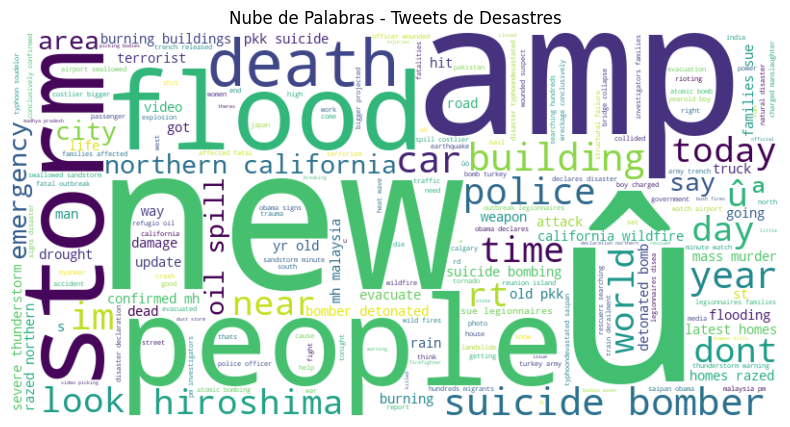

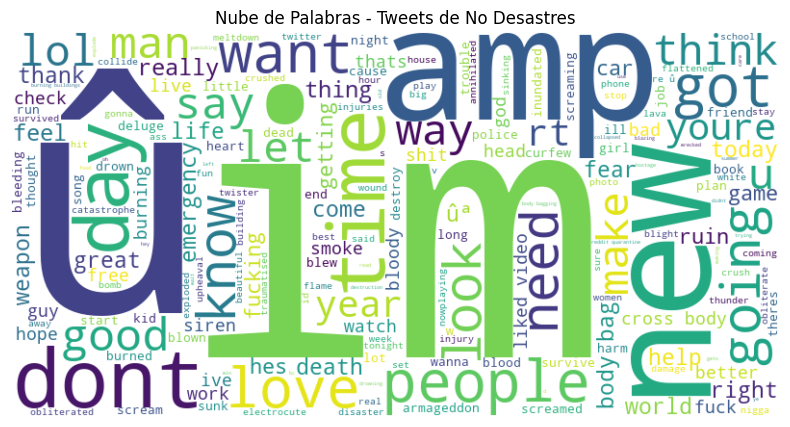

In [4]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para crear y mostrar nubes de palabras
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generar nube de palabras para tweets de desastres
create_wordcloud(" ".join(disaster_tweets), "Nube de Palabras - Tweets de Desastres")

# Generar nube de palabras para tweets que no son de desastres
create_wordcloud(" ".join(non_disaster_tweets), "Nube de Palabras - Tweets de No Desastres")


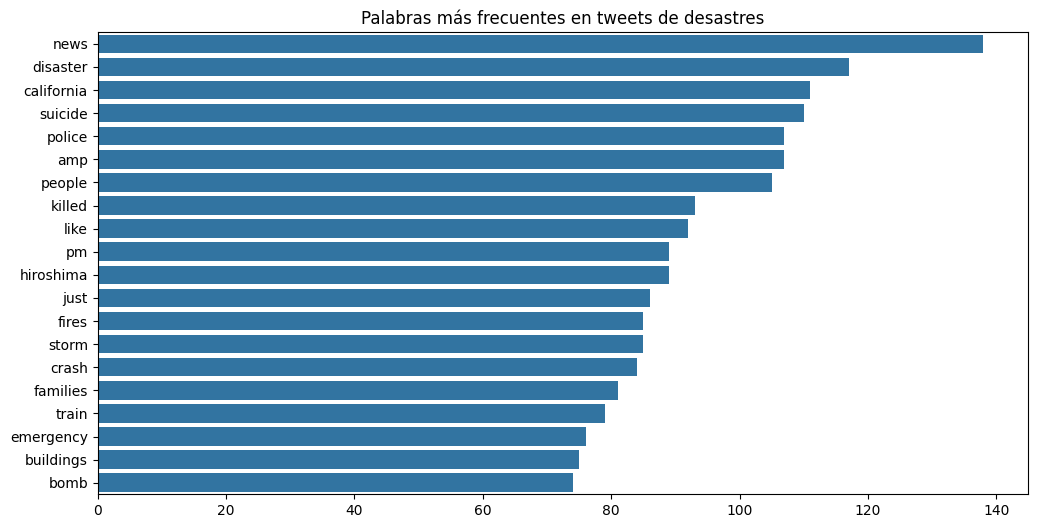

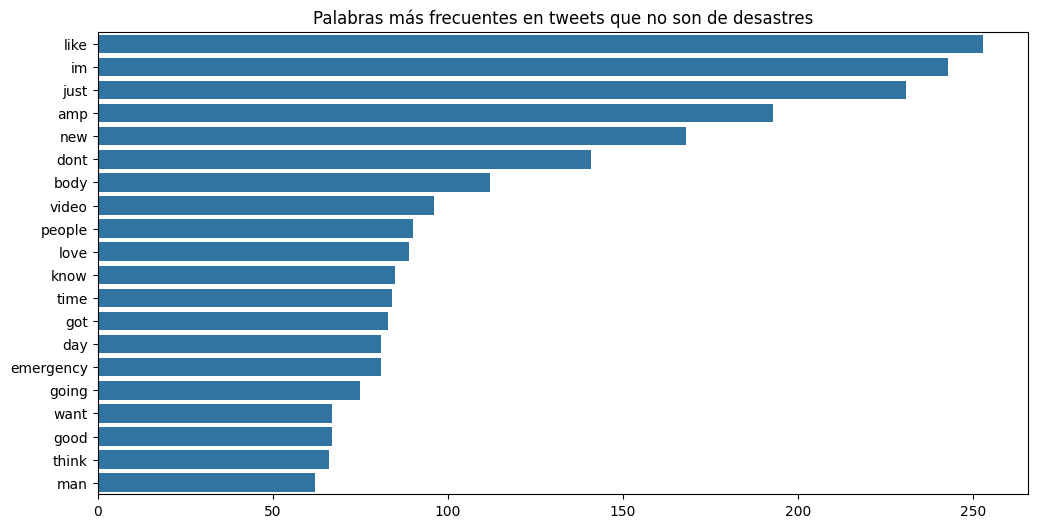

In [5]:
import seaborn as sns

# Función para crear un histograma de las palabras más frecuentes
def plot_word_frequencies(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

# Histograma de las palabras más frecuentes en tweets de desastres
plot_word_frequencies(common_disaster_words, "Palabras más frecuentes en tweets de desastres")

# Histograma de las palabras más frecuentes en tweets que no son de desastres
plot_word_frequencies(common_non_disaster_words, "Palabras más frecuentes en tweets que no son de desastres")


In [6]:
# Bigramas más comunes
bigram_freq = bigrams.sum(axis=0)
bigram_freq = [(word, bigram_freq[0, idx]) for word, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Trigramas más comunes
trigram_freq = trigrams.sum(axis=0)
trigram_freq = [(word, trigram_freq[0, idx]) for word, idx in trigram_vectorizer.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Mostrar resultados
print("\nBigramas más comunes:")
print(bigram_freq)

print("\nTrigramas más comunes:")
print(trigram_freq)



Bigramas más comunes:
[('burning buildings', 60), ('suicide bomber', 59), ('liked video', 41), ('northern california', 41), ('cross body', 39), ('oil spill', 39), ('suicide bombing', 34), ('california wildfire', 34), ('looks like', 33), ('mass murder', 32)]

Trigramas más comunes:
[('suicide bomber detonated', 30), ('northern california wildfire', 29), ('latest homes razed', 28), ('homes razed northern', 28), ('pkk suicide bomber', 28), ('bomber detonated bomb', 28), ('razed northern california', 27), ('yr old pkk', 27), ('old pkk suicide', 27), ('families sue legionnaires', 26)]


In [7]:
# Palabras comunes entre tweets de desastres y no desastres
common_words = set(disaster_words.keys()).intersection(set(non_disaster_words.keys()))
print(f"Palabras comunes en ambas categorías: {common_words}")


Palabras comunes en ambas categorías: {'streets', 'fury', 'southern', 'total', 'salmon', 'islam', 'japan', 'pull', 'fold', 'ideas', 'attacked', 'whale', 'article', 'occurs', 'fraction', 'freespeech', 'search', 'decide', 'unlocking', 'leaves', 'team', 'memphis', 'gunman', 'facing', 'famine', 'today', 'traveling', 'served', 'snap', 'al', 'tilnow', 'damages', 'hand', 'ferguson\x89ûªs', 'burnt', 'gave', 'wildhorses', 'ems', 'leo', 'hamburg', 'cheese', 'tomorrows', 'sewing', 'calls', 'walk', 'ive', 'force', 'collision', 'supports', 'solution', 'talk', 'gander', 'mom', 'movie', 'joke', 'unnecessary', 'lion', 'douchebag', 'unavoidable', 'lot', 'options', 'tragedy', 'flash', 'officially', 'chronicle', 'voter', 'centers', 'answer', 'fix', 'london', 'weekend', 'dress', 'worried', 'maybe', 'group', 'allows', 'chewing', 'pakistan', 'sketch', 'tonto', 'collins', 'completed', 'summit', 'losing', 'fifth', 'rains', 'allowed', 'failed', 'pictures', 'mma', 'accused', 'insane', 'wipp', 'ally', 'enhanced'

### **Análisis Exploratorio**

#### Nubes de Palabras

1. **Tweets de Desastres**:
   - **Palabras prominentes**: "amp," "new," "death," "people," "storm," "flood," "building," y "suicide".
   - **Análisis**: Estas palabras indican que los tweets clasificados como desastres incluyen términos relacionados con fenómenos naturales ("storm," "flood"), pérdida de vidas ("death," "suicide"), y daño a la infraestructura ("building").

2. **Tweets de No Desastres**:
   - **Palabras prominentes**: "amp," "im," "dont," "people," "time," "new," "day," y "love".
   - **Análisis**: En esta nube, se observa un lenguaje más cotidiano y emocional, con palabras como "love," "day," "im," y "dont," que reflejan conversaciones normales y temas no asociados con desastres. La presencia de "amp" de nuevo sugiere que es un término que se encuentra comúnmente en tweets en general, no necesariamente relacionado con el contenido.

#### Análisis de las Palabras Más Frecuentes

3. **Tweets de desastres**:
   - **Palabras más frecuentes**: "news," "disaster," "california," "suicide," "police," "amp," "people," y "killed."
   - **Análisis**: Las palabras clave reflejan temas de eventos trágicos, especialmente "disaster," "suicide," "killed," y términos geográficos como "california," que podría estar asociado con desastres naturales o incidentes específicos en esa región.

4. **Tweets de no desastres**:
   - **Palabras más frecuentes**: "like," "im," "just," "amp," "new," "dont," "body," y "video."
   - **Análisis**: Las palabras en este conjunto son más genéricas y parecen estar relacionadas con experiencias personales o comentarios cotidianos ("like," "im," "just"), y actividades generales como "video" y "body."

#### Análisis de Bigramas y Trigramas

5. **Bigramas más comunes**:
   - **Bigramas** como "burning buildings," "suicide bomber," "liked video," "northern california," y "oil spill" aparecen con frecuencia.
   - **Análisis**: Estos bigramas sugieren que muchos tweets clasificados como desastres están relacionados con eventos dramáticos y específicos, como incendios ("burning buildings"), ataques ("suicide bomber"), y desastres ambientales ("oil spill").

6. **Trigramas más comunes**:
   - **Trigramas** como "suicide bomber detonated," "northern california wildfire," y "latest homes razed" aparecen con alta frecuencia.
   - **Análisis**: Estos trigramas profundizan en la naturaleza específica y alarmante de los tweets de desastres, describiendo no solo eventos sino también consecuencias inmediatas y detalles geográficos.

#### Palabras Comunes en Ambas Categorías

- **Palabras comunes entre tweets de desastres y no desastres**: Hay una amplia superposición en palabras como "unsafe," "charge," "targeted," y "crush," lo que sugiere que hay ciertos términos que, aunque se usan en ambos contextos, tienen significados diferentes dependiendo del contexto completo del tweet.

#### Conclusiones

- Los tweets de desastres tienden a estar llenos de palabras que reflejan eventos trágicos, como desastres naturales, ataques violentos y emergencias, mientras que los tweets que no son de desastres contienen un lenguaje más informal y cotidiano.
- La presencia de palabras comunes en ambas categorías, como "amp" y otras palabras generales, puede dificultar la tarea de los modelos de clasificación para distinguir claramente entre desastres y no desastres, especialmente si el contexto no está claro.